In [1]:
#Imporing libraries
import numpy as np
import pandas as pd

In [2]:
#Reading csv file
data = pd.read_csv('Heart.csv')

In [3]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
#display structure of dataset
data.shape

(303, 15)

In [5]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [6]:
#check for null values
data.isna()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Display count of null is particular column
data.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
#Display's total no of null values
data.isna().sum().sum()

6

# Data Cleaning Removing null values

In [9]:
data['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [10]:
data['Ca'].fillna(0, inplace = True)

In [11]:
data['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [12]:
data['Thal'].fillna('normal', inplace = True)

In [13]:
data.isna().sum().sum()

0

# Label Encoding

In [14]:
data['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [15]:
data['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [16]:
data['AHD'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
#Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['ChestPain'] = label_encoder.fit_transform(data['ChestPain'])
data['Thal'] = label_encoder.fit_transform(data['Thal'])
data['AHD'] = label_encoder.fit_transform(data['AHD'])

In [18]:
#Label's encoded
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [19]:
#Gives first 15 rows
data.head(15)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,1,0
6,7,62,0,0,140,268,0,2,160,0,3.6,3,2.0,1,1
7,8,57,0,0,120,354,0,0,163,1,0.6,1,0.0,1,0
8,9,63,1,0,130,254,0,2,147,0,1.4,2,1.0,2,1
9,10,53,1,0,140,203,1,2,155,1,3.1,3,0.0,2,1


In [20]:
#Displays random rows
data.sample(25)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
229,230,66,1,0,112,212,0,2,132,1,0.1,1,1.0,1,1
74,75,44,1,0,110,197,0,2,177,0,0.0,1,1.0,1,1
157,158,58,1,0,125,300,0,2,171,0,0.0,1,2.0,2,1
50,51,41,0,2,105,198,0,0,168,0,0.0,1,1.0,1,0
257,258,76,0,1,140,197,0,1,116,0,1.1,2,0.0,1,0
44,45,61,0,0,130,330,0,2,169,0,0.0,1,0.0,1,1
42,43,71,0,2,160,302,0,0,162,0,0.4,1,2.0,1,0
138,139,35,1,0,120,198,0,0,130,1,1.6,2,0.0,2,1
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
165,166,57,1,0,132,207,0,0,168,1,0.0,1,0.0,2,0


In [21]:
#display info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    int32  
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    int32  
 14  AHD         303 non-null    int32  
dtypes: float64(2), int32(3), int64(10)
memory usage: 32.1 KB


In [22]:
#Displays data type of columns
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain       int32
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal            int32
AHD             int32
dtype: object

In [23]:
#no of zeros in column
(data == 0).sum(axis = 0)

Unnamed: 0      0
Age             0
Sex            97
ChestPain     144
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            180
Thal           18
AHD           164
dtype: int64

In [24]:
#no of zeros in row
(data == 0).sum(axis = 1)

0      4
1      2
2      2
3      5
4      5
      ..
298    4
299    3
300    3
301    4
302    6
Length: 303, dtype: int64

In [25]:
#Calculating mean age of patients
meanAge = data['Age'].mean()
print("\nMean age of Patients: ",meanAge)


Mean age of Patients:  54.43894389438944


In [26]:
#Extract nspecific columns
SpecificColumns = data[['Age','Sex', 'ChestPain', 'RestBP', 'Chol']]

In [27]:
SpecificColumns

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,3,145,233
1,67,1,0,160,286
2,67,1,0,120,229
3,37,1,1,130,250
4,41,0,2,130,204
...,...,...,...,...,...
298,45,1,3,110,264
299,68,1,0,144,193
300,57,1,0,130,131
301,57,0,2,130,236


In [28]:
#Training and testing of dataset
X = data.drop('AHD',axis = 1)
Y = data['AHD']

X,Y

(     Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
 0             1   63    1          3     145   233    1        2    150   
 1             2   67    1          0     160   286    0        2    108   
 2             3   67    1          0     120   229    0        2    129   
 3             4   37    1          1     130   250    0        0    187   
 4             5   41    0          2     130   204    0        2    172   
 ..          ...  ...  ...        ...     ...   ...  ...      ...    ...   
 298         299   45    1          3     110   264    0        0    132   
 299         300   68    1          0     144   193    1        0    141   
 300         301   57    1          0     130   131    0        0    115   
 301         302   57    0          2     130   236    0        2    174   
 302         303   38    1          1     138   175    0        0    173   
 
      ExAng  Oldpeak  Slope   Ca  Thal  
 0        0      2.3      3  0.0     0  
 1  

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227, 14), (76, 14), (227,), (76,))

In [31]:
#Confusion matrix
actual = list(np.ones(45))+list(np.zeros(55))

In [32]:
np.array(actual)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
predicted = list(np.ones(40))+ list(np.zeros(52))+ list(np.ones(8))
np.array(predicted)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
#Display the confusion matrics
from sklearn.metrics import ConfusionMatrixDisplay

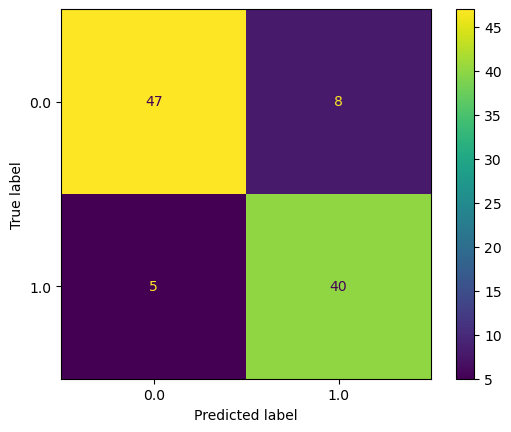

In [36]:
ConfusionMatrixDisplay.from_predictions(actual, predicted)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        55
         1.0       0.83      0.89      0.86        45

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(actual, predicted)

0.87